In [195]:
#https://www.kaggle.com/shrutimechlearn/churn-modelling

In [196]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [197]:
df = pd.read_csv('Churn_Modelling.csv')

In [198]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [199]:
df.shape

(10000, 14)

In [200]:
No_NaN = []
for col in df.columns:
    if df[col].isnull().sum():
        print(col, df[col].isnull().sum())
    else:
        No_NaN.append(col)
print('WITHOUT NaN: ', end = '')
print(*No_NaN,sep =', ')

WITHOUT NaN: RowNumber, CustomerId, Surname, CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited


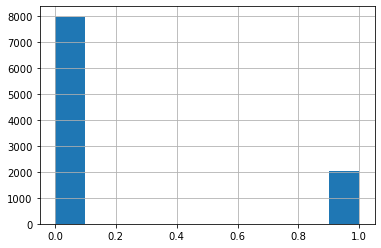

In [201]:
df['Exited'].hist();


In [202]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [203]:
df = df.drop(['Surname', 'RowNumber', "CustomerId"], axis=1)
cat_f = ['Geography', 'Gender']


In [204]:
df = pd.get_dummies(df)

In [205]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [206]:
y = df['Exited']
df = df.drop(['Exited'], axis=1)



In [207]:
features = ['CreditScore', 'Age', 
            'Tenure', 'Balance','EstimatedSalary']
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
df_1 = df[:]
ct = ColumnTransformer([
        ('somename', StandardScaler(), features)
    ], remainder='passthrough')
ct.fit_transform(df_1)

df_1 = ct.transform(df_1)



In [208]:
from sklearn.model_selection import train_test_split
np.random.seed(17)
X_train, X_test, y_train, y_test = train_test_split(df_1, y, test_size=0.25, random_state=42)


In [209]:
class LinearClassifier():
    def __init__(self, lr=0.3, h=0.01):
            self.W = None
            self.lr = lr
            self.h = h
            self.sigmoid = lambda x: 1/(1 + np.exp(-x))
    def fit(self, inputs, target = None, epoch=1, batch_size=128):
        inputs = np.array(inputs)
        target = np.array(target)
        b = np.ones((inputs.shape[0], 1))
        inputs = np.concatenate((np.array(inputs), b), axis = 1 ) 
        if self.W is None:
            self.W = 0.1 * np.random.randn(inputs.shape[1])
        
        for e in range(epoch):
            shuffle_indeces = np.arange(inputs.shape[0])
            np.random.shuffle(shuffle_indeces)
            for k in range(inputs.shape[0] // batch_size):
                
                X_batch = inputs[shuffle_indeces[k * batch_size: (k+1) * batch_size]]
                y_batch = target[shuffle_indeces[k * batch_size: (k+1) * batch_size]]
                if len(X_batch) != len(y_batch):
                    continue
                
                y_pred = X_batch @ self.W
                sigmoid = self.sigmoid(y_pred)
                grad_W = 2 * np.sum(X_batch.T @(sigmoid - y_batch))/ len(y_batch)

                errors = sigmoid - y_batch
                sigmoid = np.around(sigmoid)
                accuracy = np.sum(sigmoid == y_batch) / len(y_batch)
                
                self.W = self.W - grad_W * self.lr + self.h * np.sqrt(np.sum(self.W ** 2))
            self.lr = self.lr * 0.9
    def predict(self, inputs_test):
        inputs = np.array(inputs_test)
        b = np.ones((inputs.shape[0], 1))
        inputs = np.concatenate((np.array(inputs), b), axis = 1 ) 
        y_pred = inputs @ self.W
        sigmoid = self.sigmoid(y_pred)
        sigmoid = np.around(sigmoid)
        return sigmoid
        
        

        pass

In [210]:
def accuracy(y_pred, y):
    accuracy = np.sum(y_pred == y) / len(y)
    return np.around(accuracy, 2)
    

In [211]:
lr, h, epoch_ = 0.2, 0.03, 1
model = LinearClassifier(lr=lr, h = h)
model.fit(X_train, y_train, epoch = epoch_)
y_predict_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
acc_train = accuracy(y_predict_train, y_train)
acc_test = accuracy(y_pred_test, y_test)
print(f'------epoch :{epoch_}------')
print(f'acc train {acc_train}')
print(f'acc test {acc_test}')

------epoch :1------
acc train 0.79
acc test 0.79


In [212]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0


In [213]:
one_hot_1 = pd.get_dummies(df['NumOfProducts'],prefix='NoP')
one_hot_2 = pd.get_dummies(df['Tenure'], prefix='T')

In [214]:
df = df.join(one_hot_1)
df = df.join(one_hot_2)
df = df.drop(['NumOfProducts', 'Tenure'],axis = 1)
features = ['CreditScore', 'Age', 'Balance','EstimatedSalary']
ct = ColumnTransformer([
        ('somename', StandardScaler(), features)
    ], remainder='passthrough')
ct.fit_transform(df)

df = ct.transform(df)

In [215]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.25, random_state=42)
lr, h, epoch_ = 0.2, 0.03, 1
model = LinearClassifier(lr=lr, h = h)
model.fit(X_train, y_train, epoch = epoch_)
y_predict_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
acc_train = accuracy(y_predict_train, y_train)
acc_test = accuracy(y_pred_test, y_test)

print(f'------epoch :{epoch_}------')
print(f'acc train {acc_train}')
print(f'acc test {acc_test}')




------epoch :1------
acc train 0.79
acc test 0.8
